# backpropagation and visualization of the neural network weights



In [1]:
import networks
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
# load datasets

data_dir = Path("data")
square_simple_train = pd.read_csv(data_dir / "regression" / "square-simple-training.csv", index_col=0)
square_simple_test = pd.read_csv(data_dir / "regression" / "square-simple-test.csv", index_col=0)
steps_small_train = pd.read_csv(data_dir / "regression" / "steps-small-training.csv", index_col=0)
steps_small_test = pd.read_csv(data_dir / "regression" / "steps-small-test.csv", index_col=0)
multimodal_large_train = pd.read_csv(data_dir / "regression" / "multimodal-large-training.csv")
multimodal_large_test = pd.read_csv(data_dir / "regression" / "multimodal-large-test.csv")


# square simple train

visualisation of neural network weights will be done using a basic barplot

In [3]:
layers = [
    {"output_dim": 2, "activation": "tanh", "init": "normal"},
    {"activation": "linear"}
]

mlp = networks.MLP(layers, input=square_simple_train[["x"]].T)


In [4]:
mlp.layers[0].weights

array([[ 0.49671415],
       [-0.1382643 ]])

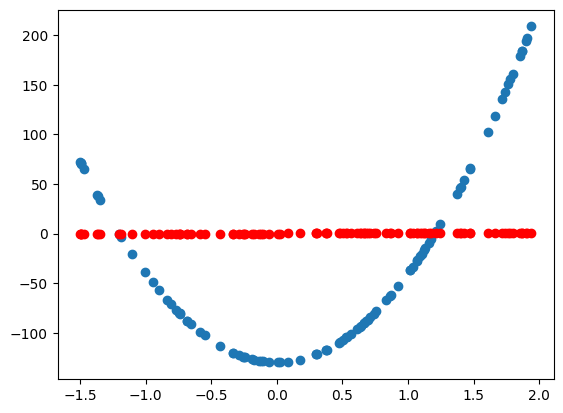

In [5]:
y_hat = mlp.full_forward_pass(square_simple_train[["x"]].T)

plt.scatter(square_simple_train["x"], square_simple_train["y"])
plt.scatter(square_simple_train["x"], y_hat.T, color="red")

In [6]:
mlp.layers[0].weights[:, 0]

array([ 0.49671415, -0.1382643 ])

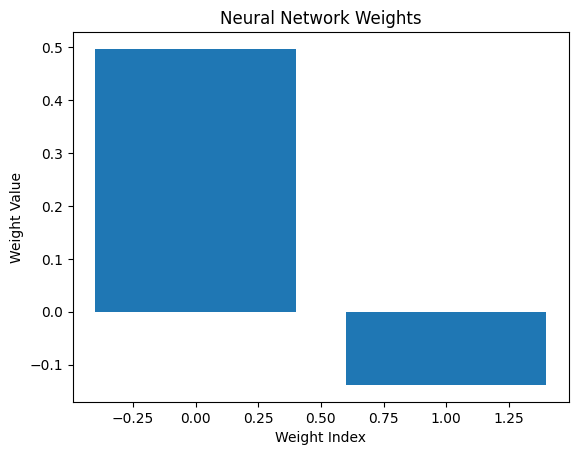

In [7]:
plt.bar(range(len(mlp.layers[0].weights)), mlp.layers[0].weights[:, 0])
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.title('Neural Network Weights')
plt.show()

[ 0.49671415 -0.1382643 ]


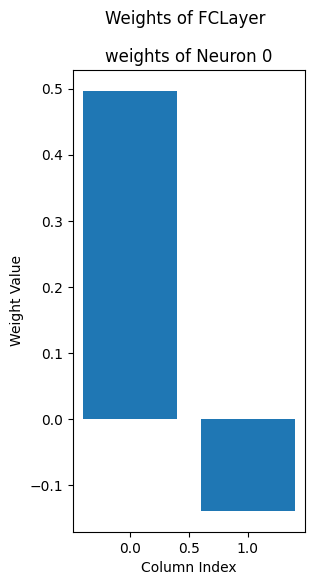

[0.73199394]
[0.59865848]


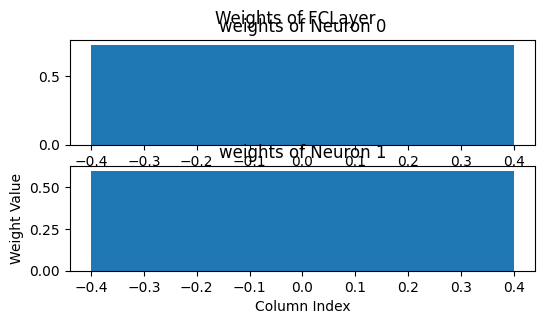

In [8]:
mlp.layers[0].plot_weights()
mlp.layers[1].plot_weights()

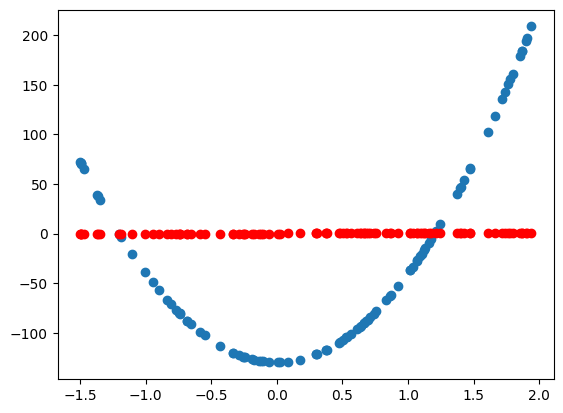

In [9]:
plt.scatter(square_simple_train["x"], square_simple_train["y"])
plt.scatter(square_simple_train["x"], mlp.full_forward_pass(square_simple_train[["x"]].T).T, color="red")

In [10]:
norm = networks.assets.Normalizator(square_simple_train)

square_simple_train_norm = norm(square_simple_train)
square_simple_test_norm = norm(square_simple_test)

In [31]:
mlp.calculate_loss(square_simple_train_norm[["x"]].T.to_numpy(), square_simple_train_norm[["y"]].T.to_numpy())

np.random.seed(124)

mlp = networks.MLP(layers, input=square_simple_train[["x"]].T)


In [35]:

point = mlp.layers[0].weights

k = 100
x1 = np.linspace(-2 + point[0][0], 2 + point[1][0], k)
x2 = np.linspace(-2 + point[0][0], 2 + point[1][0], k)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros_like(X1)

for i in range(k):
    if i % 10 == 0:
        print(f"i = {i}")
    for j in range(k):
        mlp.layers[0].weights = np.array([[X1[i, j]], [X2[i, j]]])
        Z[i, j] = mlp.calculate_loss(square_simple_train_norm[["x"]].T.to_numpy(), square_simple_train_norm[["y"]].T.to_numpy())


i = 0
i = 10
i = 20
i = 30
i = 40
i = 50
i = 60
i = 70
i = 80
i = 90


In [33]:
point

array([[ 0.28847906],
       [-0.46295408]])

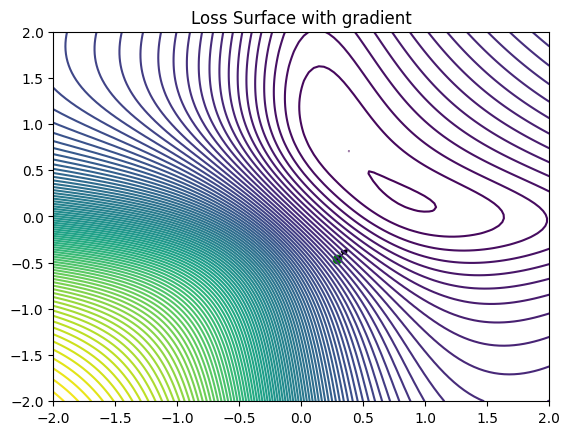

In [34]:
plt.contour(X1, X2, Z, 100)

# add dot for self.beta
plt.scatter(point[0], point[1], c = 'g')
# draw arrow for gradient
plt.arrow(point[0][0], point[1][0], -1 * dw[0][0][0], -1 * dw[0][1][0], head_width=0.05, head_length=0.05, fc='k', ec='k')
plt.title("Loss Surface with gradient")
plt.show()

In [16]:
mlp.layers[0].weights = point
mlp.calculate_loss(square_simple_train_norm[["x"]].T.to_numpy(), square_simple_train_norm[["y"]].T.to_numpy())

0.8334680934196431

In [17]:
mlp.layers[0].weights = point
mlp.layers[0].weights[0] = mlp.layers[0].weights[0] - 0.01 * dw[0][0][0]
mlp.layers[0].weights[1] = mlp.layers[0].weights[1] - 0.01 * dw[0][1][0]

mlp.calculate_loss(square_simple_train_norm[["x"]].T.to_numpy(), square_simple_train_norm[["y"]].T.to_numpy())

0.8323983457158571

now we want to calculate the partial derivative over the layers


In [18]:
dw, db = mlp.full_backward_propagation(square_simple_train[["x"]].T.to_numpy(), square_simple_train[["y"]].T.to_numpy())
mlp.layers[0].weights -= 1 * dw[0]
mlp.layers[0].bias -= 1 * db[0]

In [19]:
norm = networks.assets.Normalizator(square_simple_train)

square_simple_train_norm = norm(square_simple_train)
square_simple_test_norm = norm(square_simple_test)

In [20]:
dw, db = mlp.full_backward_propagation(square_simple_train_norm[["x"]].T.to_numpy(), square_simple_train_norm[["y"]].T.to_numpy())
print([dw[i].mean() for i in range(len(dw))])

[-0.0212157853877849, 1.6811225258554108]


Epoch: 0, Loss: 0.9502830923127038
Epoch: 100, Loss: 0.22874056740911697
Epoch: 200, Loss: 0.07896578066135923
Epoch: 300, Loss: 0.043213546449309116
Epoch: 400, Loss: 0.025042711543011725


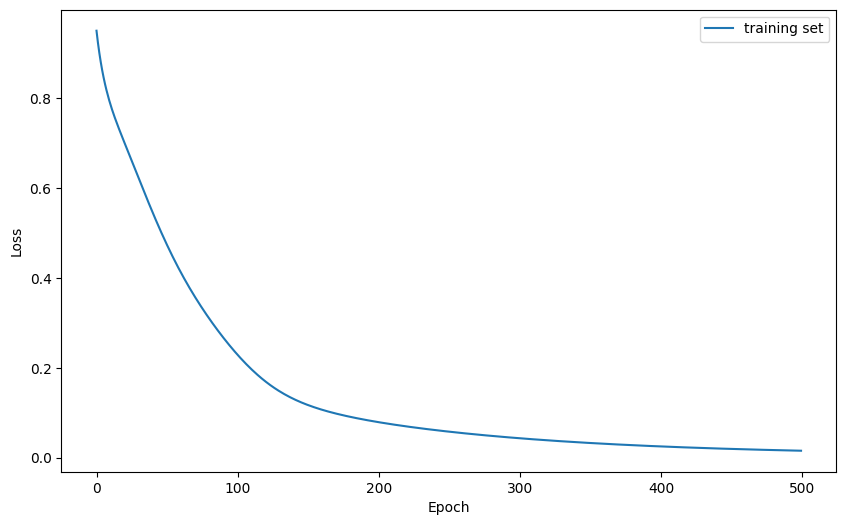

In [24]:
mlp = networks.MLP(layers, input=square_simple_train[["x"]].T)

losses = mlp.train(square_simple_train_norm[["x"]].T.to_numpy(), square_simple_train_norm[["y"]].T.to_numpy(), learning_rate=0.1, max_epochs=500, batch_size=1000)


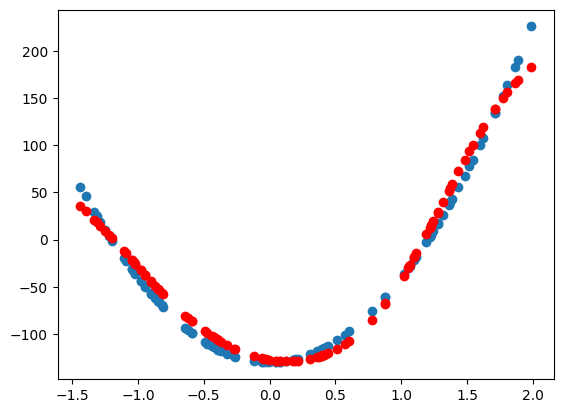

In [25]:
y_hat = mlp.full_forward_pass(square_simple_test_norm[["x"]].T)

plt.scatter(square_simple_test["x"], square_simple_test["y"])
plt.scatter(square_simple_test["x"], norm.denorm(y_hat.T, index="y"), color="red")

In [26]:
mse = np.mean((square_simple_test["y"] - norm.denorm(y_hat.T, index="y").to_numpy().flatten())**2)
mse

116.39752279151998

more layers

In [50]:
layers = [
    {"output_dim": 5, "activation": "relu", "init": "he"},
    {"output_dim": 5, "activation": "relu", "init": "he"},
    {"activation": "linear"}
]

norm = networks.assets.Normalizator(square_simple_train)

square_simple_train_norm = norm(square_simple_train)
square_simple_test_norm = norm(square_simple_test)

mlp = networks.MLP(layers, input=square_simple_train_norm[["x"]].T)

Epoch: 0, Loss: 0.00024084327603527615
Epoch: 100, Loss: 0.00024074213080785503
Epoch: 200, Loss: 0.00024064191871427877
Epoch: 300, Loss: 0.00024054262504504743
Epoch: 400, Loss: 0.00024044423543363058
Epoch: 500, Loss: 0.0002403467358461637
Epoch: 600, Loss: 0.00024025011257156352
Epoch: 700, Loss: 0.00024015435221193008
Epoch: 800, Loss: 0.000240059441673319
Epoch: 900, Loss: 0.00023996536815681747
Epoch: 1000, Loss: 0.00023987211914993931
Epoch: 1100, Loss: 0.00023977968241828266
Epoch: 1200, Loss: 0.000239688045997528
Epoch: 1300, Loss: 0.00023959719818565132
Epoch: 1400, Loss: 0.00023950712753543934
Epoch: 1500, Loss: 0.00023941782284724007
Epoch: 1600, Loss: 0.00023932927316197024
Epoch: 1700, Loss: 0.00023924146775434313
Epoch: 1800, Loss: 0.00023915439612631848
Epoch: 1900, Loss: 0.00023906804800080905
Epoch: 2000, Loss: 0.0002389824133155346
Epoch: 2100, Loss: 0.00023889748221713126
Epoch: 2200, Loss: 0.00023881324505542416
Epoch: 2300, Loss: 0.0002387296923779071
Epoch: 2400

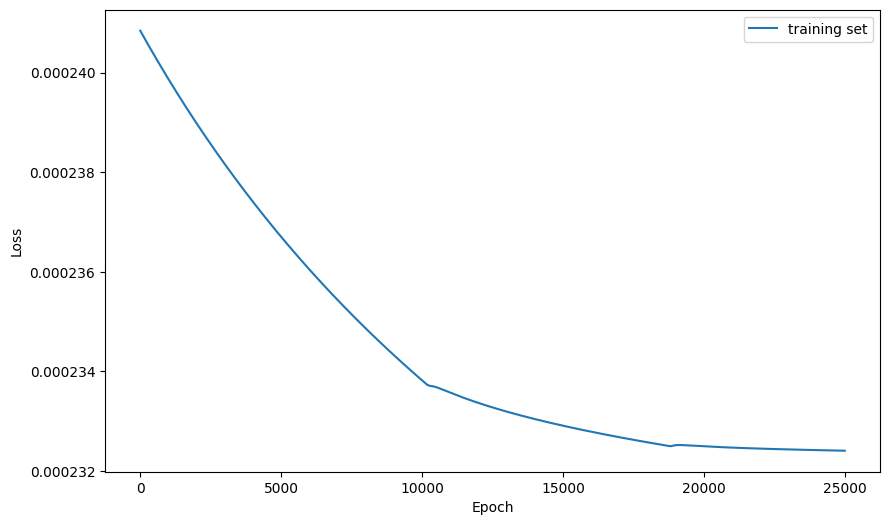

In [53]:
losses = mlp.train(square_simple_train_norm[["x"]].T.to_numpy(), square_simple_train_norm[["y"]].T.to_numpy(), learning_rate=0.02, max_epochs=25000, batch_size=32)

MSE on test data:  3.933616696415152


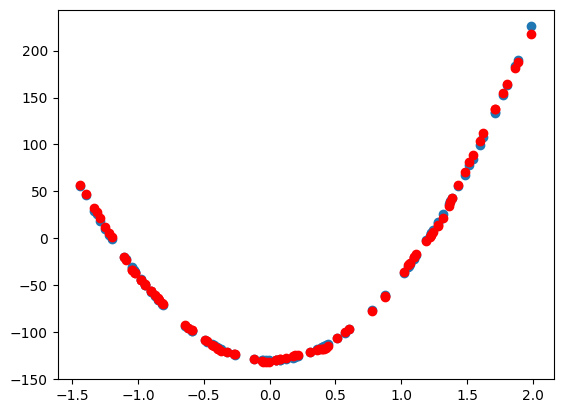

In [55]:
y_hat = mlp.full_forward_pass(square_simple_test_norm[["x"]].T).to_numpy()

y_hat_denorm = norm.denorm(y_hat.T, index="y").flatten()
plt.scatter(square_simple_test["x"], square_simple_test["y"])
plt.scatter(square_simple_test["x"], y_hat_denorm, color="red")

mse = np.mean((square_simple_test["y"] - y_hat_denorm)**2)
print("MSE on test data: ", mse)

thats enough small MSE

## steps small 

In [56]:
layers = [
    {"output_dim": 5, "activation": "sigmoid", "init": "he"},
    #{"output_dim": 3, "activation": "relu", "init_method": "he"},
    {"output_dim": 5, "activation": "sigmoid", "init": "he"},
    {"output_dim": 5, "activation": "sigmoid", "init": "normal"},

    {"activation": "linear", "init": "normal"}
]



norm_steps = networks.assets.Normalizator(steps_small_train)
steps_small_train_norm = norm_steps(steps_small_train)
steps_small_test_norm = norm_steps(steps_small_test)

mlp_steps = networks.MLP(layers, input=steps_small_train_norm[["x"]].T)


In [57]:
steps_small_train_norm[["x"]].T.to_numpy().shape[1]

50

Epoch: 0, Loss: 1.005672153159352
Epoch: 100, Loss: 0.05341506843658543
Epoch: 200, Loss: 0.03822056309447954
Epoch: 300, Loss: 0.02304385842969063
Epoch: 400, Loss: 0.03209320895131646
Epoch: 500, Loss: 0.015375206932568547
Epoch: 600, Loss: 0.014658183568069612
Epoch: 700, Loss: 0.013078129212929583
Epoch: 800, Loss: 0.01675539035136336
Epoch: 900, Loss: 0.010776282556572538
Epoch: 1000, Loss: 0.009623466817166405
Epoch: 1100, Loss: 0.008554554304052138
Epoch: 1200, Loss: 0.008359138965169087
Epoch: 1300, Loss: 0.00837068415665926
Epoch: 1400, Loss: 0.0057270795856375
Epoch: 1500, Loss: 0.004986293620467536
Epoch: 1600, Loss: 0.003963382351437911
Epoch: 1700, Loss: 0.002886991661738982
Epoch: 1800, Loss: 0.0024095596536261484
Epoch: 1900, Loss: 0.002002718215463201
Epoch: 2000, Loss: 0.0021602544591770075
Epoch: 2100, Loss: 0.0020208749017901627
Epoch: 2200, Loss: 0.0016160650707046401
Epoch: 2300, Loss: 0.001958703476762706
Epoch: 2400, Loss: 0.002288012136193898
Epoch: 2500, Loss: 

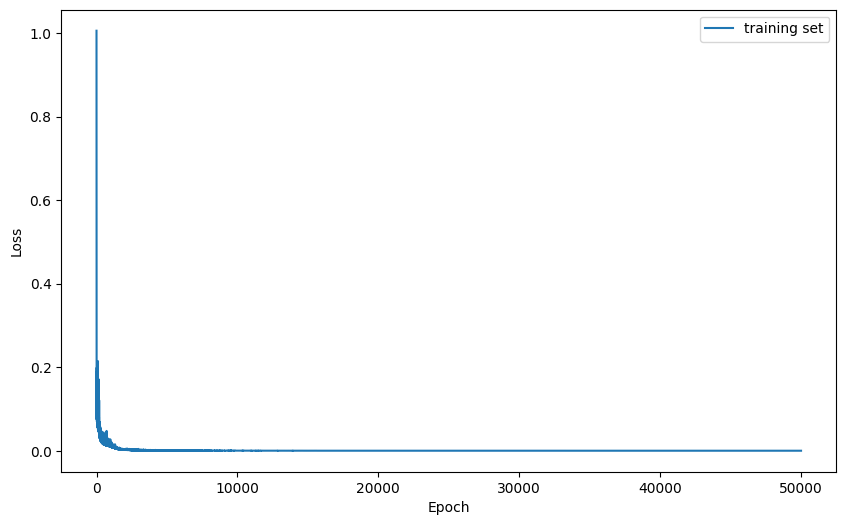

In [58]:
mlp_steps = networks.MLP(layers, input=steps_small_train_norm[["x"]].T)


losses = mlp_steps.train(steps_small_train_norm[["x"]].T.to_numpy(), steps_small_train_norm[["y"]].T.to_numpy(), 
                         max_epochs=50000, learning_rate = 0.2, batch_size=32, stochastic_descent=True)
# losses = mlp_steps.minibatch_train(steps_small_train_norm[["x"]].T.to_numpy(), steps_small_train_norm[["y"]].T.to_numpy(), 0.1, 20000)


MSE on train data:  0.05630837262868905


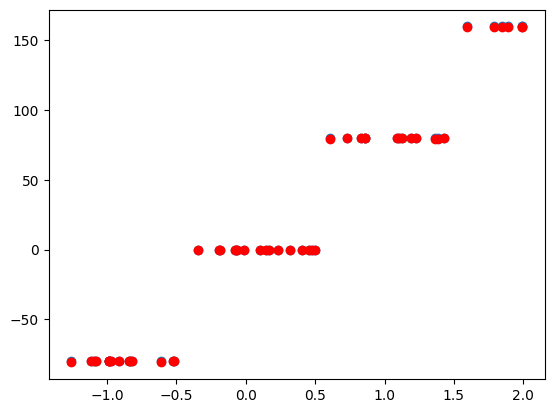

In [59]:
y_hat = mlp_steps.full_forward_pass(steps_small_train_norm[["x"]].T).to_numpy()

plt.scatter(steps_small_train["x"], steps_small_train["y"])
plt.scatter(steps_small_train["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")

mse = np.mean((steps_small_train["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on train data: ", mse)

MSE on test data:  177.68618231919328


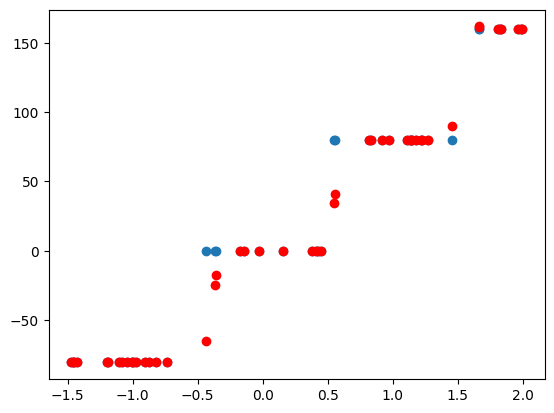

In [60]:
y_hat = mlp_steps.full_forward_pass(steps_small_test_norm[["x"]].T.to_numpy())

plt.scatter(steps_small_test["x"], steps_small_test["y"])
plt.scatter(steps_small_test["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")

mse = np.mean((steps_small_test["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)

# Multimodal large

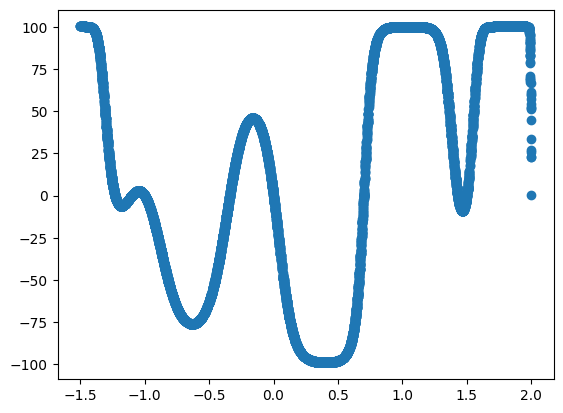

In [61]:

norm_multimodal = networks.assets.Normalizator(multimodal_large_train)

multimodal_large_train_norm = norm_multimodal(multimodal_large_train)
multimodal_large_test_norm = norm_multimodal(multimodal_large_test)

plt.scatter(multimodal_large_train["x"], multimodal_large_train["y"])

In [62]:
multimodal_large_train_norm.std()

x    1.0
y    1.0
dtype: float64

Epoch: 0, Loss: 0.31808657191302575
Validation Loss: 0.32141310351386865
Epoch: 100, Loss: 0.09027037018643005
Validation Loss: 0.09807645597377299
Epoch: 200, Loss: 0.05225112969237315
Validation Loss: 0.05413376135998561
Epoch: 300, Loss: 0.030128748057863537
Validation Loss: 0.030106805065969744
Epoch: 400, Loss: 0.021205907243828294
Validation Loss: 0.02015575194315684
Epoch: 500, Loss: 0.01481872225248226
Validation Loss: 0.013691279113054598
Epoch: 600, Loss: 0.007207079472194282
Validation Loss: 0.006247052866247987
Epoch: 700, Loss: 0.004211571753102845
Validation Loss: 0.0032638109079237898
Epoch: 800, Loss: 0.0031663783205642536
Validation Loss: 0.0021809995134420817
Epoch: 900, Loss: 0.002926992909484458
Validation Loss: 0.0019347042395263614
Epoch: 1000, Loss: 0.0026225005311381975
Validation Loss: 0.00166675887598507
Epoch: 1100, Loss: 0.0023932112436995845
Validation Loss: 0.0014764946076367567
Epoch: 1200, Loss: 0.002276166620944418
Validation Loss: 0.0013914927886198006

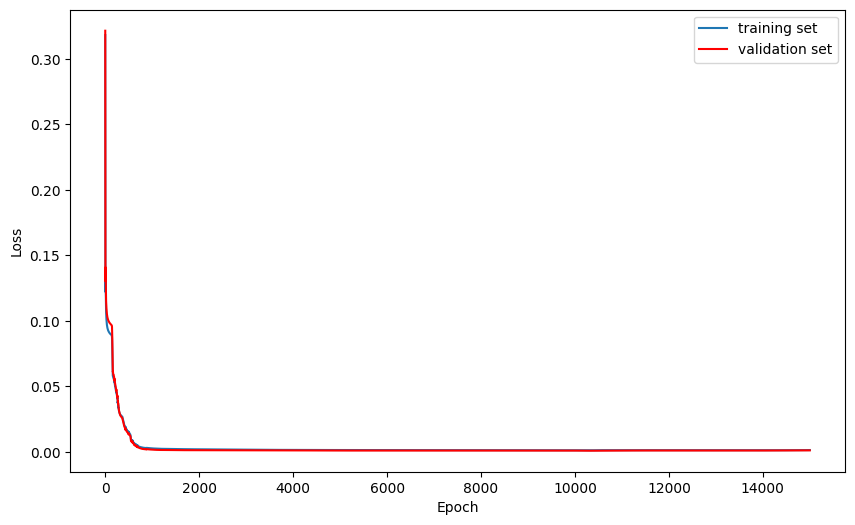

In [73]:
layers = [
    {"output_dim": 20, "activation": "relu", "init": "he"},
    {"output_dim": 20, "activation": "relu", "init": "he"},
    {"activation": "linear", "init": "normal"}
]


mlp_multimodal = networks.MLP(layers, input=multimodal_large_train_norm[["x"]].T)


losses = mlp_multimodal.train(multimodal_large_train_norm[["x"]].T.to_numpy(), multimodal_large_train_norm[["y"]].T.to_numpy(), multimodal_large_test_norm[["x"]].T.to_numpy(), multimodal_large_test_norm[["y"]].T.to_numpy(), 
                              max_epochs=15000, batch_size=32, learning_rate=0.02)


MSE on test data:  5.71380119430858


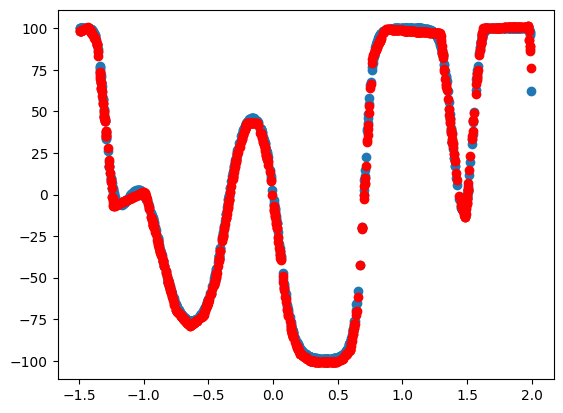

In [74]:
y_hat = mlp_multimodal.full_forward_pass(multimodal_large_test_norm[["x"]].T.to_numpy())

plt.scatter(multimodal_large_test["x"], multimodal_large_test["y"])
plt.scatter(multimodal_large_test["x"], norm_multimodal.denorm(y_hat.T, index="y"), color="red")

mse = np.mean((multimodal_large_test["y"] - norm_multimodal.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)